In [83]:
import torch
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

data = pd.read_csv("dataset.csv")
#data.head()

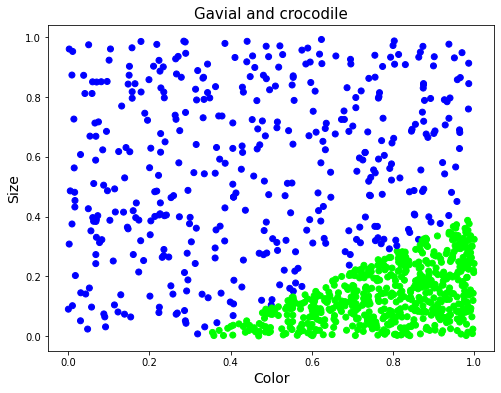

In [84]:
plt.figure(figsize=(8,6))
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=data['target'], cmap='brg')
plt.title('Gavial and crocodile', fontsize=15)
plt.xlabel('Color', fontsize=14)
plt.ylabel('Size', fontsize=14)
plt.show()

In [85]:
X = data.iloc[:,:2].values[:]
Y = data['target'].values[:]

num_features = X.shape[1]
neuron = torch.nn.Sequential(torch.nn.Linear(num_features, out_features=2), torch.nn.Sigmoid())
neuron

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Sigmoid()
)

In [86]:
neuron(torch.autograd.Variable(torch.FloatTensor([1,1])))


tensor([0.5506, 0.3002], grad_fn=<SigmoidBackward>)

In [87]:
X = torch.autograd.Variable(torch.FloatTensor(X))
Y = torch.autograd.Variable(torch.LongTensor(Y.astype(np.int64)))

loss_func = torch.nn.CrossEntropyLoss()
learning_rate = 5e-3
optimizer = torch.optim.Adam(neuron.parameters(), lr=learning_rate)
num_epochs = 500

for i in range(num_epochs):
    y_pred = neuron(X)
    loss = loss_func(y_pred, Y)
    if i % 50 == 0:
        print(f'Iter: {i} -> Loss: {loss.data}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Iter: 0 -> Loss: 0.6712254285812378
Iter: 50 -> Loss: 0.6334726214408875
Iter: 100 -> Loss: 0.6063153147697449
Iter: 150 -> Loss: 0.5865650177001953
Iter: 200 -> Loss: 0.5706629753112793
Iter: 250 -> Loss: 0.5569598078727722
Iter: 300 -> Loss: 0.5448393821716309
Iter: 350 -> Loss: 0.5339987277984619
Iter: 400 -> Loss: 0.5242311358451843
Iter: 450 -> Loss: 0.5153830051422119


In [88]:
y_pred

tensor([[0.2837, 0.7114],
        [0.1655, 0.8376],
        [0.2308, 0.7584],
        ...,
        [0.2365, 0.7527],
        [0.6108, 0.3854],
        [0.6108, 0.3854]], grad_fn=<SigmoidBackward>)